In [1]:
# Import libraries
import glob
import numpy as np
import matplotlib.pyplot as plt
import corner
import math
from IPython.display import display, Math
plt.rcParams['font.size'] = '14'

In [2]:
grid_data = np.loadtxt('./Adaptative_Searching/solved_model_calibration.txt')
grid = np.loadtxt('./Adaptative_Searching/grid_model_calibration.txt')

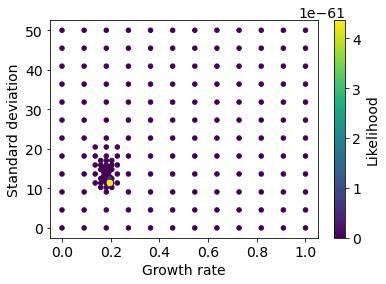

In [3]:
fig, ax = plt.subplots()
ax.set_ylabel('Standard deviation')
ax.set_xlabel('Growth rate')
im = ax.scatter(grid_data[:,0],grid_data[:,1], c=np.exp(grid_data[:,2]), s=20)
#im = ax.scatter(grid_data[:,0],grid_data[:,1], c=grid_data[:,2], s=20)
fig.colorbar(im, ax=ax,label='Likelihood')
plt.savefig('solution_grid.pdf', bbox_inches = 'tight', pad_inches = 0.02)
plt.show()

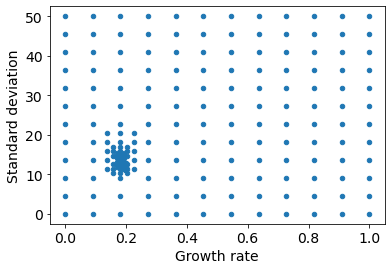

In [4]:
fig, ax = plt.subplots()
ax.set_ylabel('Standard deviation')
ax.set_xlabel('Growth rate')
im = ax.scatter(grid_data[:,0],grid_data[:,1], s=20)
plt.savefig('model_grid.pdf', bbox_inches = 'tight', pad_inches = 0.02)
plt.show()

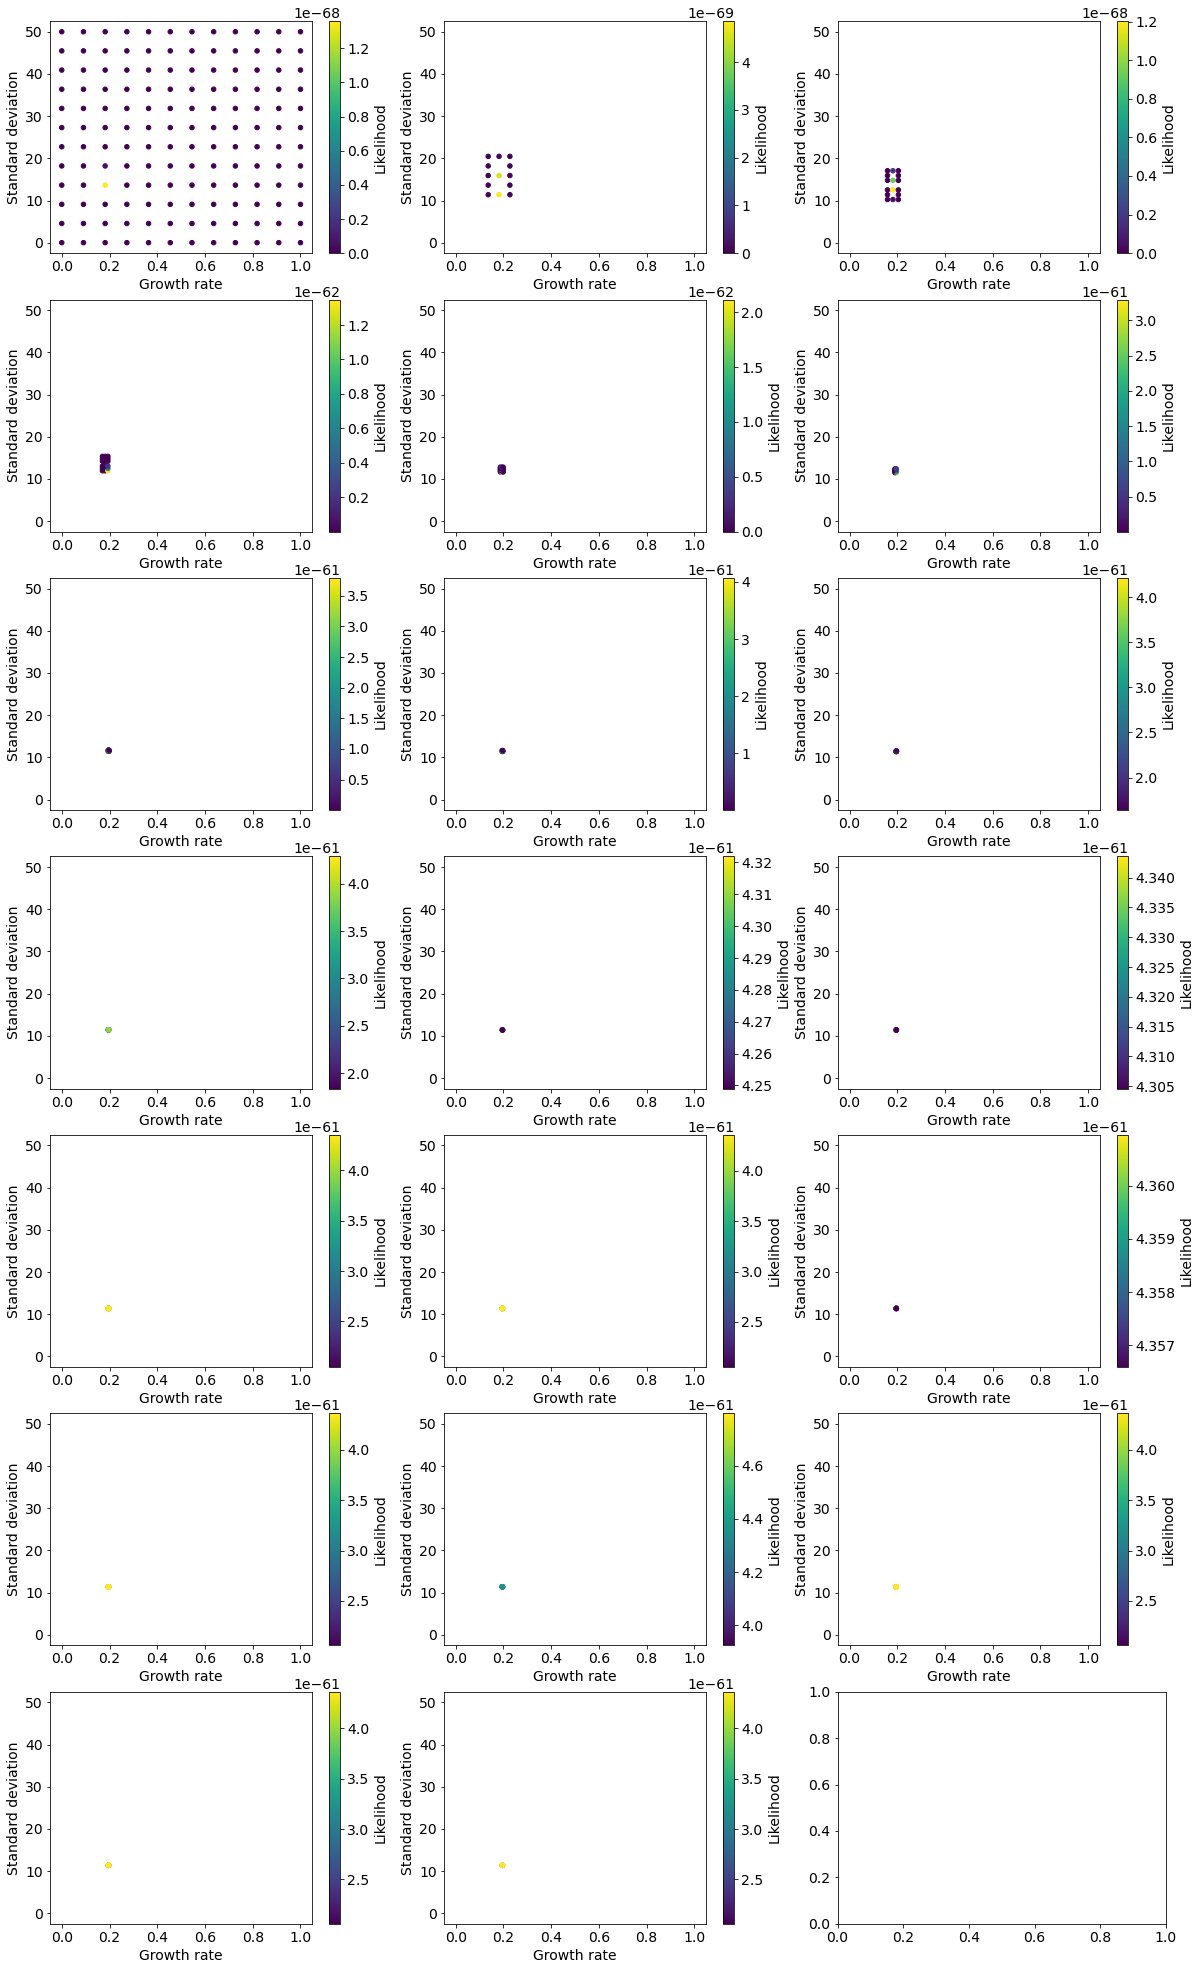

In [5]:
FilenamesList = glob.glob('./Adaptative_Searching/solved_model_calibration_lvl*.txt')
SortedList = sorted(FilenamesList)
rows = math.ceil(len(SortedList)/3)
rsize = rows*5
fig, axes = plt.subplots(rows,3, figsize=(20, rsize), sharex=False, sharey=False)
for p in range(len(SortedList)):
    ax = axes[math.floor(p/3)][p%3]
    ax.set_ylabel('Standard deviation')
    ax.set_xlabel('Growth rate')
    data = np.loadtxt(SortedList[p])
    im = ax.scatter(data[:,0],data[:,1], c=np.exp(data[:,2]), s=20)
    if p == 0:
        ylim = ax.get_ylim()
        xlim = ax.get_xlim()
    else:
        ax.set_ylim(ylim)
        ax.set_xlim(xlim)
    fig.colorbar(im, ax=ax,label='Likelihood')
plt.savefig('all_grids.pdf', bbox_inches = 'tight', pad_inches = 0.02)
plt.show()